In [1]:
# import dependendencies
from splinter import Browser
from bs4 import BeautifulSoup as bs
import numpy as np

In [2]:
# Open the browser from which we want to extract 
executable_path = {'executable_path': 'chromedriver.exe'}
browser = Browser('chrome', **executable_path, headless=False)
url = "https://www.meetup.com/find/us--nj--trenton/arts-culture/?eventType=inPerson&distance=tenMiles"
 
browser.visit(url)
html = browser.html

<html class="wf-graphikmeetup-n4-active wf-active"><head><meta charset="utf-8"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/><link href="https://maps.googleapis.com" rel="preconnect"/><script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript"></script><script async="" src="https://public.profitwell.com/js/profitwell.js?auth=6ca61ceeee8bf5751e13d633b3d1c24c"></script><script async="" src="//bat.bing.com/bat.js"></script><script async="" src="https://connect.facebook.net/signals/config/1754032478149369?v=2.9.32&amp;r=stable"></script><script async="" src="https://connect.facebook.net/en_US/fbevents.js"></script><script async="" src="https://snap.licdn.com/li.lms-analytics/insight.min.js" type="text/javascript"></script><script async="" crossorigin="anonymous" src="https://connect.facebook.net/en_US/sdk.js?hash=b052f8d665fdf801d61a391481b90b0b&amp;ua=modern_es6"
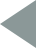
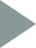
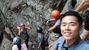
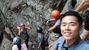
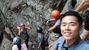
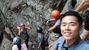
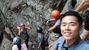
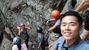
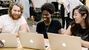
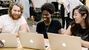
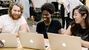
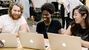
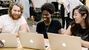
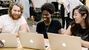
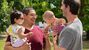
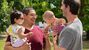
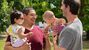
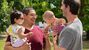
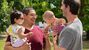
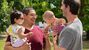
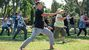
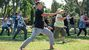
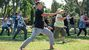
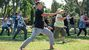
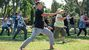
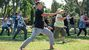
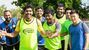
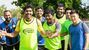
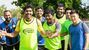
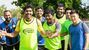
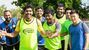
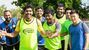
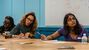
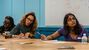
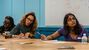
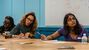
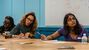
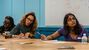
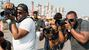
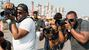
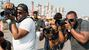
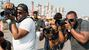
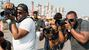
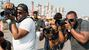
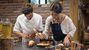
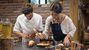
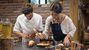
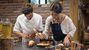
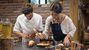
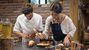
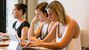
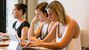
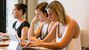
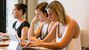
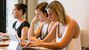
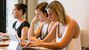
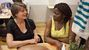
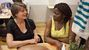
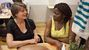
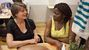
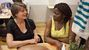
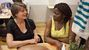
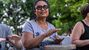
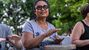
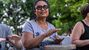
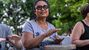
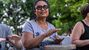
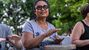
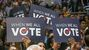
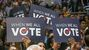
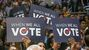
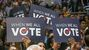
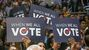
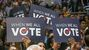
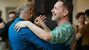
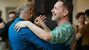
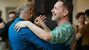
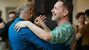
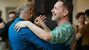
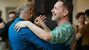
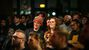
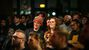
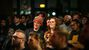
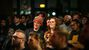
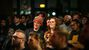
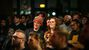
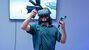
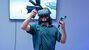
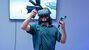
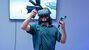
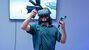
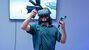
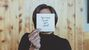
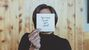
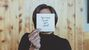
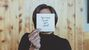
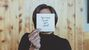
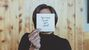
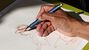
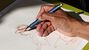
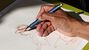
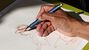
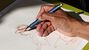
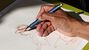
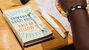
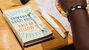
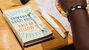
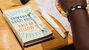
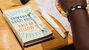
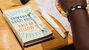
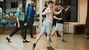
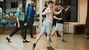
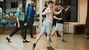
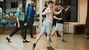
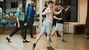
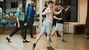
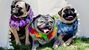
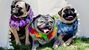
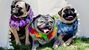
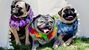
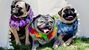
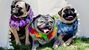
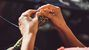
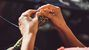
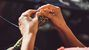
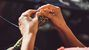
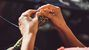
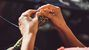
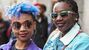
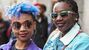
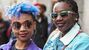
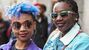
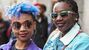
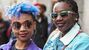
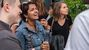
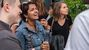
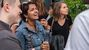
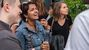
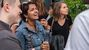
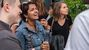
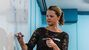
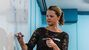
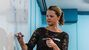
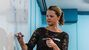
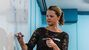
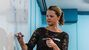

In [3]:
# Create a beautiful soup object that stores the website's html
soup = bs(html, 'html.parser')
soup

In [4]:
# Scrape all the events
# class = css-1gl3lql
events = soup.find_all('p', class_='css-1jy1jkx')
events
events_arr = []
for event in events:
    events_arr.append(event.text)
    

events_arr

['START THE NEW YEAR WITH ART - Free One Day Pass to Grounds For Sculpture Today ',
 'Secrets of the Battle of Princeton: History and Nature Walk']

In [5]:
# Number of events 
no_of_events = len(events_arr)
print(no_of_events)


2


In [18]:
events_descriptions = soup.find_all('p', class_='css-ycqk9')
events_descriptions

group_names_arr = []
for desc in events_descriptions:
    desc_text = desc.text
    desc_text = desc_text.split(':')[1]
    group_names_arr.append(desc_text)
    
group_names_arr

['Central Jersey 56 Plus', 'Secrets of the Battle of Princeton Tours']

In [19]:
attendees = soup.find_all('div', class_="css-1dwjarq")
attendees

attendees_lst = []
for attendee_count in attendees:
    attendee_count = attendee_count.text
    attendee_count = attendee_count.split(' ')[0]
    attendees_lst.append(attendee_count)
    
attendees_lst

['1', '20']

In [46]:
events = soup.find_all('div', class_='css-11tad7j')
events
event_links = []
for event in events:
    
    for a in event.find_all('a', href=True):
        link_text = a['href']
        event_links.append(link_text)
        
event_links

['https://www.meetup.com/CJ-56plus/events/275689348',
 'https://www.meetup.com/Secrets-of-the-Princeton-Battlefield-Tours/events/272652579']

In [47]:
grouped_lst = []

for event, group_name, attendee_count, event_link in zip(events_arr, group_names_arr, attendees_lst, event_links):
    grouped_lst.append([event, group_name, attendee_count, event_link])
    
grouped_lst

[['START THE NEW YEAR WITH ART - Free One Day Pass to Grounds For Sculpture Today ',
  'Central Jersey 56 Plus',
  '1',
  'https://www.meetup.com/CJ-56plus/events/275689348'],
 ['Secrets of the Battle of Princeton: History and Nature Walk',
  'Secrets of the Battle of Princeton Tours',
  '20',
  'https://www.meetup.com/Secrets-of-the-Princeton-Battlefield-Tours/events/272652579']]

In [7]:
# Load the scraped data into a dataframe